In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


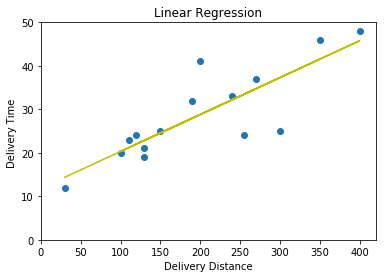

In [3]:
from sklearn.linear_model import LinearRegression

data = np.array([
    [30, 12],[150, 25],[300, 25],[400, 48],[130, 21],
    [240, 33], [350, 46], [200, 41], [100, 20], [110, 23],
    [190, 32], [120, 24], [130, 19], [270, 37], [255, 24]
])

plt.scatter(data[:, 0], data[:, 1]) #산포도 
plt.title("Linear Regression")
plt.xlabel("Delivery Distance")
plt.ylabel("Delivery Time ")
plt.axis([0, 420, 0 ,50])

x = data[:, 0].reshape(-1, 1) #input
y = data[:, 1].reshape(-1, 1) #output

model = LinearRegression()
model.fit(x, y) #선형 모델 학습

y_pred = model.predict(x)
plt.plot(x, y_pred, color = 'Y')
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]
confusion matrix : 
 [[65  3]
 [ 8 24]]
정확도 :  0.89


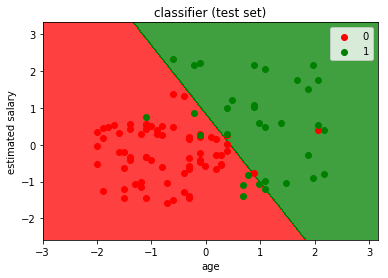

In [5]:
dataset = pd.read_csv('User_Data.csv') 

x = dataset.iloc[:, [2,3]].values #Get Train data
y = dataset.iloc[:, 4].values #Get Train Label

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)
#split dataset into train and test

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() #정규화
xtrain = sc_x.fit_transform(xtrain) #train data 정규화
xtest = sc_x.transform(xtest) #test data 정규화

print(xtrain[0:10, :])

from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state = 0)
classifer.fit(xtrain, ytrain) #training
y_pred = classifer.predict(xtest) # 학습모델 테스트

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred) #혼동 행렬생성 --> 모델 평가시 사용
print("confusion matrix : \n", cm)

from sklearn.metrics import accuracy_score
print("정확도 : ", accuracy_score(ytest, y_pred)) #정확도 계산

#draw
from matplotlib.colors import ListedColormap
x_set, y_set = xtest, ytest
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, #랜덤으로 좌표위에 직사각형 격자를 만듬. 
                              stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifer.predict(np.array([x1.ravel(), x2.ravel()]).T) #등치선을 만듬.
            .reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(("red", "green"))(i), label = j)

plt.title("classifier (test set)")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend()
plt.show()
